In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point, MultiPoint
pd.set_option('display.max_rows', 100)

In [2]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_shp/sp_pop_shp.shp')

In [3]:
sp_shp

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,distrito_x,pop_maior_,distrito_y,pop_maio_1,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,47,112070,47,102489,"POLYGON ((352436.869 7394174.148, 352450.740 7..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,46,234998,46,215021,"POLYGON ((320696.639 7383620.282, 320699.486 7..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,5,82837,5,77007,"POLYGON ((349461.276 7397764.525, 349461.935 7..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,40,19980,40,18694,"POLYGON ((320731.080 7400614.592, 320732.386 7..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,93,88100,93,82721,"POLYGON ((338651.039 7392203.484, 338654.034 7..."
5,4.0,8583480.0,1.0,JAGUARE,JRE,41,08,2007-03-19,0.0,41,45185,41,41683,"POLYGON ((320606.161 7394439.116, 320608.927 7..."
6,4.0,8583481.0,1.0,JARAGUA,JAR,42,02,2007-03-19,0.0,42,169714,42,154212,"POLYGON ((320069.659 7407622.486, 320069.992 7..."
7,4.0,8583482.0,1.0,JD HELENA,JDH,44,23,2007-03-19,0.0,44,104992,44,95353,"POLYGON ((353421.390 7401397.366, 353420.401 7..."
8,4.0,8583483.0,1.0,JD PAULISTA,JDP,45,11,2007-03-19,0.0,45,78846,45,75767,"POLYGON ((329650.535 7390883.219, 329645.838 7..."
9,4.0,8583486.0,1.0,LAJEADO,LAJ,96,28,2007-03-19,0.0,96,136321,96,123505,"POLYGON ((354138.975 7396739.337, 354136.244 7..."


In [12]:
def generate_random(number, polygon):
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(pointsx) < number:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if polygon.contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    )
    return df

In [98]:
def generate_random2(number, polygon):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        gdf_point = gpd.points_from_xy(x, y)
        if polygon.contains(gdf_point):
            points.append(gdf_point)
    return points

In [16]:
poligono = sp_shp[sp_shp['COD_DIST'] == 47]

In [17]:
poligono

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,distrito_x,pop_maior_,distrito_y,pop_maio_1,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,47,112070,47,102489,"POLYGON ((352436.869 7394174.148, 352450.740 7..."


In [38]:
# Create an empty dataframe
# pop_simulated = pd.DataFrame(columns=['x', 'y'])
pop_simulated = pd.DataFrame()

# For each event within a district, generate a lat long
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.01:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

In [ ]:
points = []
minx, miny, maxx, maxy = polygon.bounds
while len(points) < number:
    pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
    if polygon.contains(pnt):
        points.append(pnt)

In [4]:
minx, miny, maxx, maxy = sp_shp.at[0, "geometry"].bounds

In [18]:
x_min, y_min, x_max, y_max = poligono.total_bounds

In [25]:
n = 100
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)

In [26]:
x

array([355487.91546575, 353053.21861267, 355402.25692464, 354947.17932457,
       355232.53996971, 354714.26561364, 353329.6607372 , 352873.54493649,
       352951.71645754, 353355.40763362, 353532.81327313, 353193.94875984,
       354887.10383945, 352694.86444568, 352605.0890785 , 355209.8280125 ,
       354761.99273757, 355310.92878377, 355243.50431751, 352864.55368907,
       353464.20782226, 355615.57126041, 354354.71423713, 353133.81309288,
       355362.3336394 , 355096.56504135, 355090.30041792, 353298.42339558,
       352459.74657836, 355419.61993206, 353174.2659732 , 352919.34572888,
       355364.92730649, 352532.33557584, 355563.03173576, 354321.86667529,
       353805.76696661, 355489.55273121, 354616.87934103, 353030.87556376,
       353031.32418557, 354719.55141488, 355666.40718589, 355539.36245869,
       355607.78386817, 353647.05605403, 355614.08971284, 352533.98528433,
       355156.8481583 , 354143.09671872, 352845.93491312, 353282.02785936,
       354222.9508557 , 3

In [20]:
gdf_point = gpd.points_from_xy(x, y)

In [21]:
gdf_point

In [32]:
pop_simulated

,x,y
0,354759.431318,7.390738e+06
1,353074.298232,7.393193e+06
2,353715.666268,7.395039e+06
3,352740.556974,7.395083e+06
4,354320.156922,7.394927e+06
...,...,...
46,332588.844476,7.394807e+06
47,332472.033530,7.396102e+06
48,332535.606481,7.395926e+06
49,332218.828531,7.395664e+06


In [43]:
sp_shp['pop_maio_1'].sum()

8920780

In [106]:
sp_shp.at[0, "geometry"].unary_union

AttributeError: 'Polygon' object has no attribute 'unary_union'

In [33]:
pop_simulated = pd.DataFrame(columns=[['x', 'y']])

In [44]:
pop_simulated.append()

ValueError: DataFrame constructor not properly called!

In [47]:
pd.DataFrame([x,y], columns=[['x', 'y']])

ValueError: Shape of passed values is (2, 1), indices imply (2, 2)

In [128]:
pop = []
for index, row in sp_shp.iterrows():
    pop.append(unlist(generate_random(row['pop_maio_1']*0.001, row["geometry"])))

NameError: name 'unlist' is not defined

In [13]:
teste = generate_random(102489*0.01, sp_shp.at[0, "geometry"])

In [117]:
sp_shp.at[0, "geometry"].bounds

(352320.6515, 7389951.242956, 355673.401, 7396748.6838077)

In [14]:
teste

,x,y
0,354096.737107,7.390490e+06
1,352815.203142,7.394482e+06
2,354205.411248,7.394432e+06
3,354138.313765,7.393434e+06
4,354436.500775,7.392529e+06
...,...,...
1020,352817.087401,7.394561e+06
1021,354199.284159,7.391529e+06
1022,353608.018833,7.393727e+06
1023,352958.130417,7.392882e+06


In [39]:
gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)
print(gdf)

                 x             y                        geometry
0    353195.807764  7.393759e+06  POINT (353195.808 7393759.463)
1    352758.036332  7.395204e+06  POINT (352758.036 7395204.326)
2    354137.088436  7.390152e+06  POINT (354137.088 7390151.804)
3    353700.302301  7.390887e+06  POINT (353700.302 7390887.059)
4    352973.988573  7.393767e+06  POINT (352973.989 7393766.860)
..             ...           ...                             ...
496  332562.120090  7.396291e+06  POINT (332562.120 7396291.201)
497  333116.396307  7.395762e+06  POINT (333116.396 7395762.149)
498  332292.900711  7.395648e+06  POINT (332292.901 7395648.035)
499  332512.890519  7.395029e+06  POINT (332512.891 7395029.405)
500  332136.523573  7.394494e+06  POINT (332136.524 7394494.107)

[89258 rows x 3 columns]


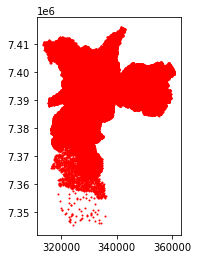

In [41]:
gdf.plot(marker='o', color='red', markersize=1);

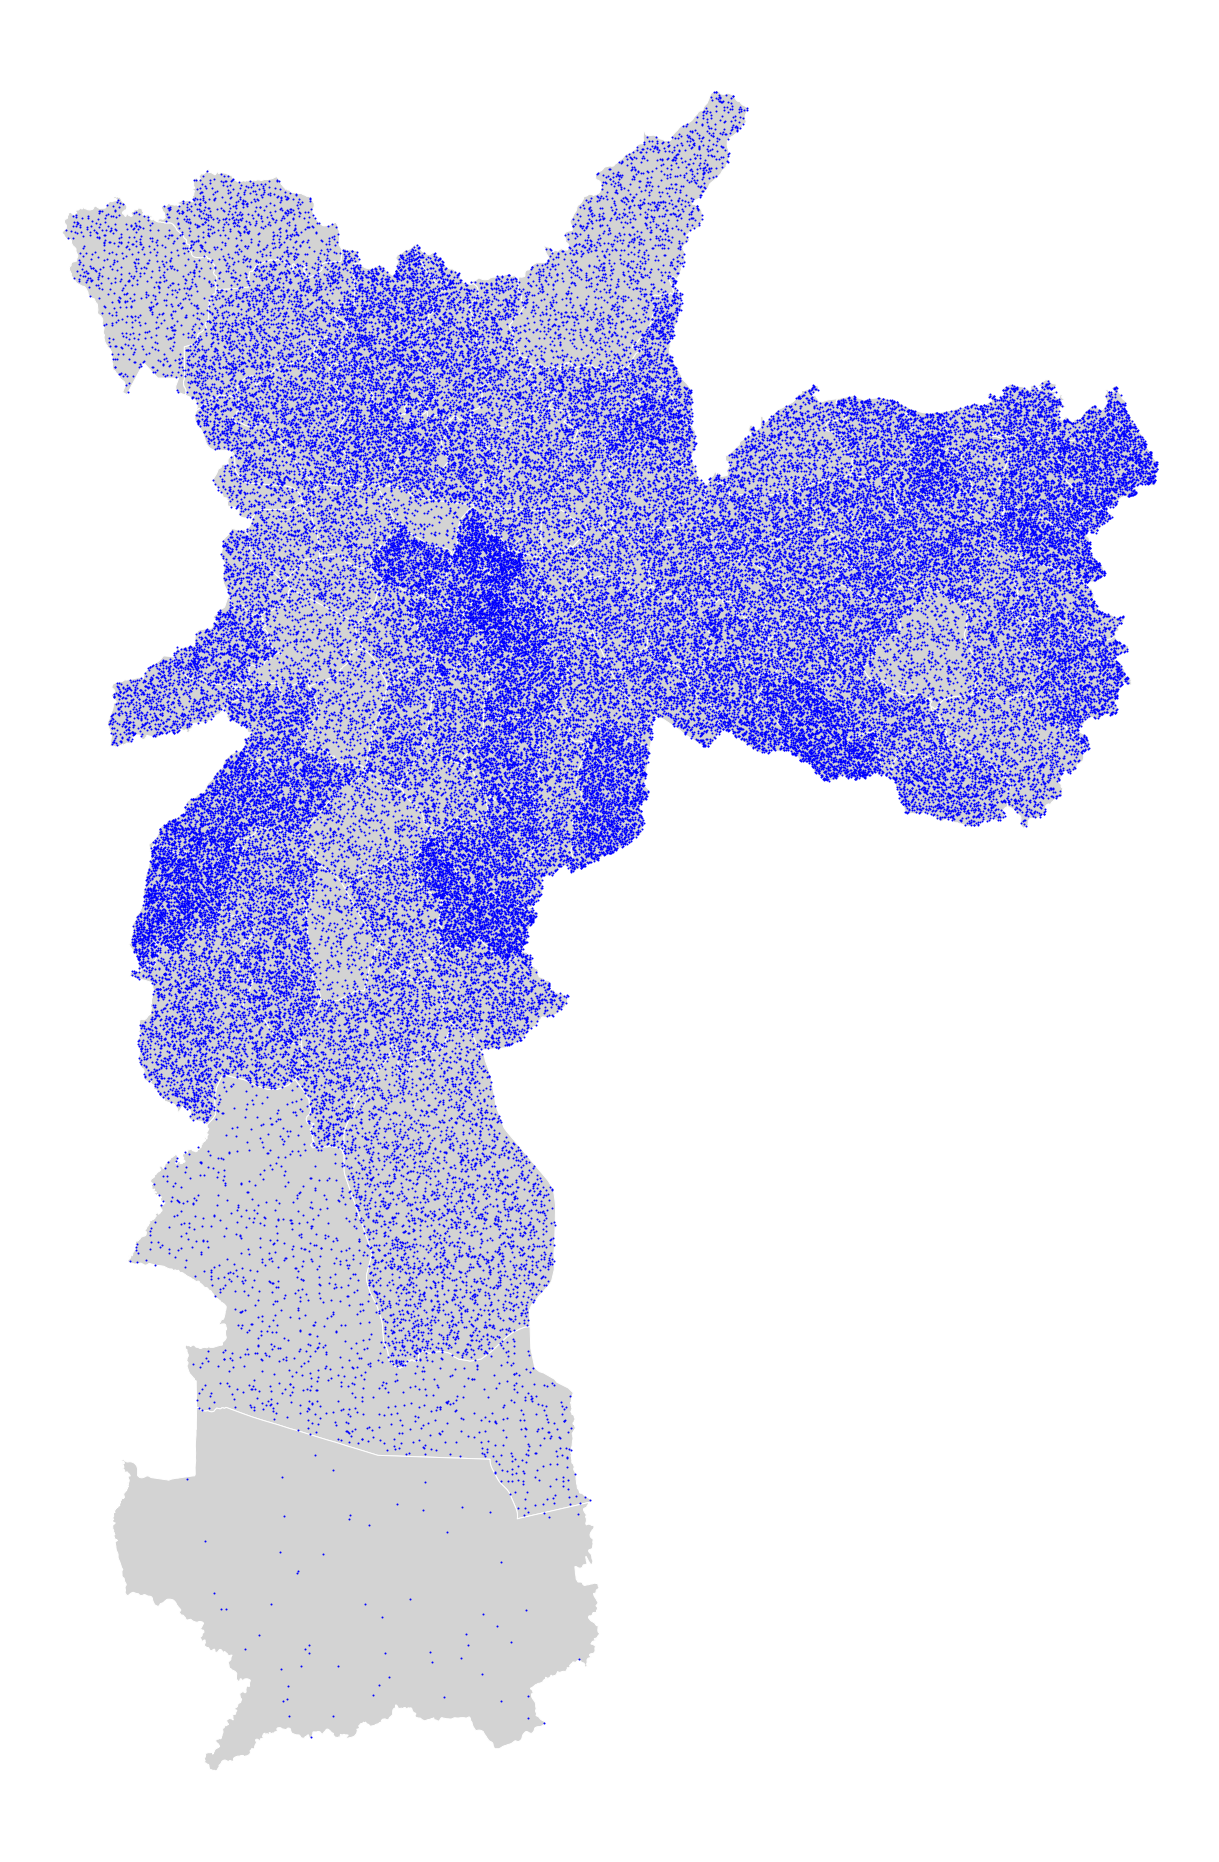

In [42]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
gdf.plot(ax=ax, color='blue', markersize=1)

ax.axis("off")
plt.show()